In [2]:
from mpl_toolkits.mplot3d import Axes3D
import json
import optuna
from optuna.visualization import plot_parallel_coordinate
from optuna import create_study, Trial
# Load the results from the JSON file
with open("optuna_logging.json", "r") as file:
    data = json.load(file)

/home/hpc/rzku/mrvl005h/miniconda3/envs/ffcv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
data

[{'value': 2795.6201171875,
  'params': {'batch_size': 32,
   'learning_rate': 6.873208490149841e-05,
   'step_silsze': 40}},
 {'value': 2783.6787109375,
  'params': {'batch_size': 32,
   'learning_rate': 1.1631243269095787e-05,
   'step_silsze': 10}},
 {'value': 2776.55419921875,
  'params': {'batch_size': 32,
   'learning_rate': 1.2261653005948527e-05,
   'step_silsze': 30}},
 {'value': 2425.43994140625,
  'params': {'batch_size': 64,
   'learning_rate': 0.06735146735844053,
   'step_silsze': 20}},
 {'value': 2232.22216796875,
  'params': {'batch_size': 128,
   'learning_rate': 0.006191621779849768,
   'step_silsze': 40}},
 {'value': 2117.48681640625,
  'params': {'batch_size': 256,
   'learning_rate': 0.03465199388038952,
   'step_silsze': 30}},
 {'value': 2785.6435546875,
  'params': {'batch_size': 32,
   'learning_rate': 0.001977219017196444,
   'step_silsze': 40}},
 {'value': 2390.684814453125,
  'params': {'batch_size': 64,
   'learning_rate': 0.00016103863787532083,
   'step_si

In [3]:
next(iter(data))["params"]

{'batch_size': 32, 'learning_rate': 6.873208490149841e-05, 'step_silsze': 40}

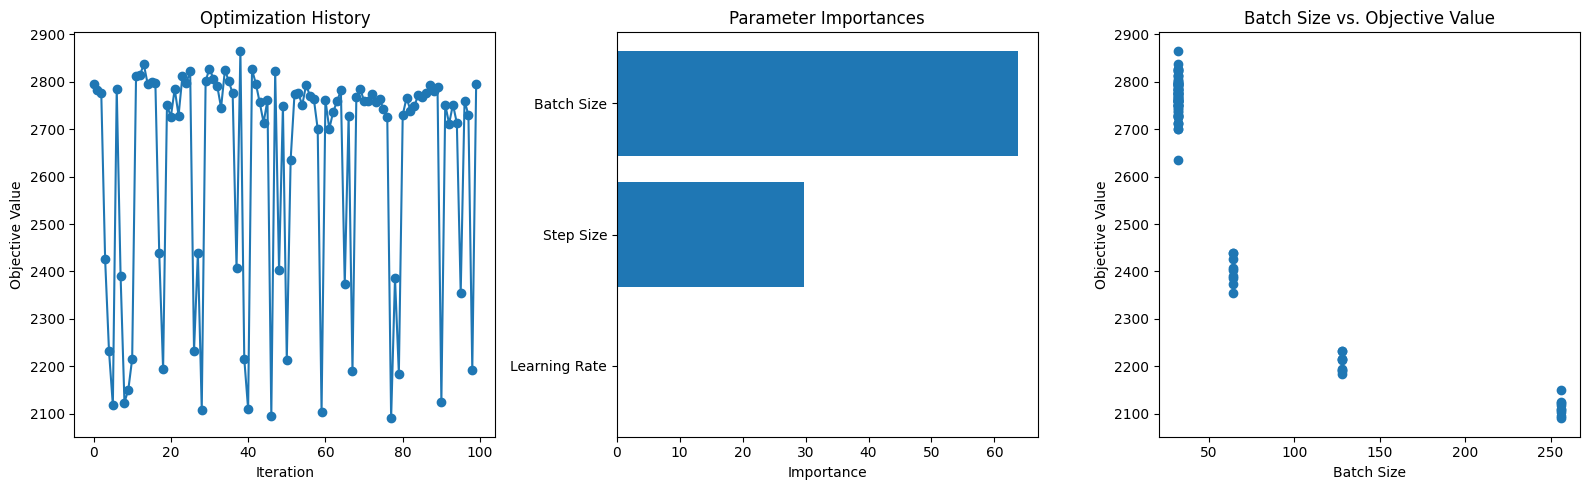

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Your data


# Extract values and parameters from data
values = [trial['value'] for trial in data]
learning_rates = [trial['params']['learning_rate'] for trial in data]
step_sizes = [trial['params']['step_silsze'] for trial in data]
batch_sizes = [trial['params']['batch_size'] for trial in data]

# Plot optimization history
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.plot(values, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Optimization History')

# Plot parameter importances
plt.subplot(1, 3, 2)
plt.barh(['Learning Rate', 'Step Size', 'Batch Size'], [np.mean(learning_rates), np.mean(step_sizes), np.mean(batch_sizes)])
plt.xlabel('Importance')
plt.title('Parameter Importances')

# Plot Batch Size vs. Objective Value
plt.subplot(1, 3, 3)
plt.scatter(batch_sizes, values, marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Objective Value')
plt.title('Batch Size vs. Objective Value')

plt.tight_layout()
plt.show()


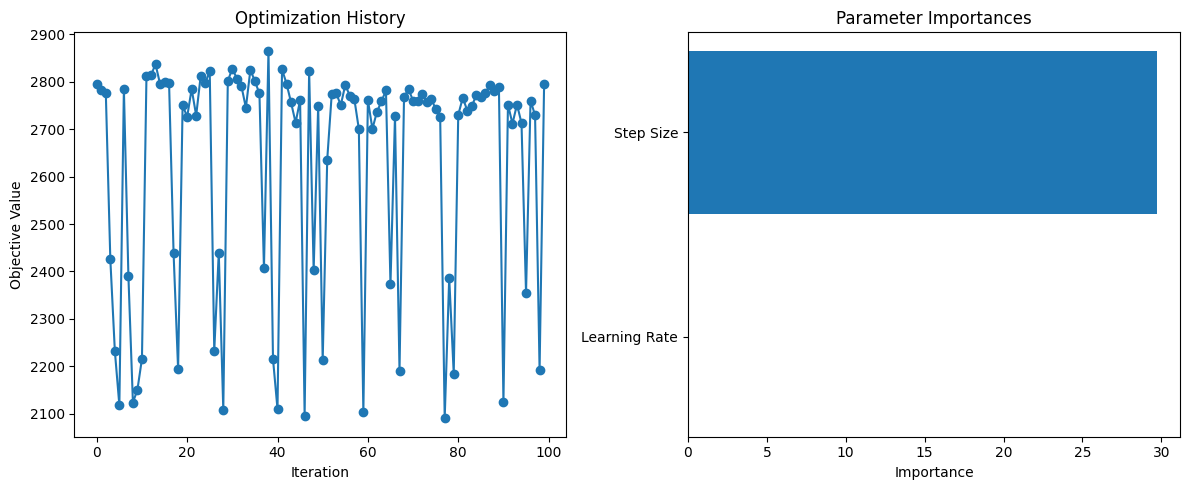

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Your data

# Extract values and parameters from data
values = [trial['value'] for trial in data]
learning_rates = [trial['params']['learning_rate'] for trial in data]
step_sizes = [trial['params']['step_silsze'] for trial in data]

# Plot optimization history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(values, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Optimization History')

# Plot parameter importances
plt.subplot(1, 2, 2)
plt.barh(['Learning Rate', 'Step Size'], [np.mean(learning_rates), np.mean(step_sizes)])
plt.xlabel('Importance')
plt.title('Parameter Importances')

plt.tight_layout()
plt.show()


In [ ]:
    batch_size = trial.suggest_categorical("batch_size", [32,64,128,256])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
    step_size = trial.suggest_categorical("step_silsze", [10, 20, 30, 40, 50])

In [17]:
study = optuna.create_study(direction="minimize")

for trial_dict in data:
    # params = {
    #     "learning_rate": trial_dict["params"]["learning_rate"],
    #     "batch_size": trial_dict["params"]["batch_size"],
    #     "step_silsze": trial_dict["params"]["step_silsze"],
    # }

    params = {
    "learning_rate": optuna.trial.suggest_loguniform("learning_rate", 1e-5, 1e-1),
    "batch_size": optuna.trial.suggest_categorical("batch_size", [32,64,128,256]),
    "step_size": optuna.trial.suggest_categorical("step_silsze", [10, 20, 30, 40, 50]),
    }


    # Define distributions for parameters (you might need to adjust these)
    distributions = {
        "learning_rate": optuna.distributions.UniformDistribution(0.001, 0.1),
        "batch_size": optuna.distributions.CategoricalDistribution([16, 32, 64]),
        "step_silsze": optuna.distributions.UniformDistribution(0.1, 1.0),
    }

    trial = optuna.trial.create_trial(
        state=optuna.trial.TrialState.COMPLETE,
        value=trial_dict["value"],
        params=params,
        distributions=distributions,
    )
    study.add_trial(trial)

# Visualize the study
optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_param_importances(study)

[I 2023-12-13 00:54:38,988] A new study created in memory with name: no-name-5366c594-da21-45a7-a8fa-43143a55f6be


AttributeError: module 'optuna.trial' has no attribute 'suggest_loguniform'

In [ ]:
optuna.trial.

In [4]:
from optuna.visualization import plot_parallel_coordinate
from optuna import create_study
# Import the necessary modules

# Initialize the study using the data properties
study = 3(storage=data)

# Visualize the important features using Optuna
plot_parallel_coordinate(study)


AttributeError: 'list' object has no attribute 'create_new_study'

In [3]:
type(data)

list